# Ramandeep Jagdev

# Git hub = Ramandeep72

# USC ID = 3023879240

# 3 days of grace period being used

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import seaborn as sns
import glob 
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://stackoverflow.com/questions/36445193/splitting-one-csv-into-multiple-files

#using this function, I can split the dataset from 1 in set {1,2,...20}

def split(df, split_number):
    #how big is each row
    row_size = df.shape[0]               
    
    #length of each split 
    split_len = row_size - (row_size%split_number) 
    
    # Finding the size of splits 
    split_size = row_size//split_number                   
    
    final_df = pd.DataFrame()
    
    for i in range(0,split_len,split_size):
        
        df_list = df.loc[i:i+split_size-1,:]  
        # Reindexing it to no of instances. i.e. 88 
        df_list.index = range(split_size)      
        # Concatinates dataframes with axis 1 i.e. to columns
        final_df = pd.concat([final_df, df_list], axis = 1)   
        
        
    return final_df

In [4]:
def split_data(l):

    class_set = ['bending2', 'cycling', 'lying','sitting', 'standing', 'walking']
    
    #this is the first file in the datset
    #https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
    file = sorted(glob.glob('dataset_OG/bending1/*.csv'))
    
    
    for i in class_set:
        path = 'dataset'                                                
        file1 = sorted(glob.glob(path + '//' + i + '/dataset*.csv'))   
        #print(file1)
        #check verfied and in right order 10/12 RSJ
        file.extend(file1)

    
    columns=[]           
    column_names =['mean_','std_','min_','FirstQuartileRange_','median_','ThrirdQuartileRange_','max_']
    
    for i in range(1,(6*l)+1):
        for j in range(0,7):
            columns.append(column_names[j]+str(i))
            
    
    name_in_csv = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
    
    final_df = []
    df_dummy = pd.DataFrame()
    df_test = df_dummy
    df_train = df_dummy
    for i in range(len(file)):
        #reads one csv
        data = pd.read_csv(file[i], skiprows=4, error_bad_lines=False, usecols = name_in_csv)
        #put the csv into the dataframe
        df = pd.DataFrame(data)
        #function call to split dataset into n specific parts
        df = split(df, l)
        #gives you the values you need to make the list you need
        df = df.describe()  
        #drop the count column, only one you dont need 
        df = df.drop(['count'])
        #the df.describe lists the values you need vertically, need to make them horizantal 
        final_df.append(df.T)
        #this if statement is made with respect to the ordr of the files in the dataset 
        
        if (0 <= i <= 1) or (7 <= i <= 8) or (13 <= i <= 15) or (28 <= i <= 30) or (43 <= i <= 45) or (58 <= i <= 60) or (72 <= i <= 74):
            df_dummy_TEST = final_df[i]
            df_dummy_TEST.index = range(len(df.columns)) 
            df_dummy_TEST= split(df_dummy_TEST, len(df.columns))   # Creates a different test dataframe based on the splits mentioned in part 1b
            df_test = pd.concat([df_test, df_dummy_TEST])
        else:
            df_dummy_TRAIN = final_df[i]
            df_dummy_TRAIN.index = range(len(df.columns)) 
            df_dummy_TRAIN= split(df_dummy_TRAIN, len(df.columns))  # Cretes a different train dataframe based on the split mentioned in part 1b
            df_train = pd.concat([df_train, df_dummy_TRAIN])
        
    df_train.index = range(69)
    df_test.index = range(19)
    df_train.columns = columns
    df_test.columns = columns
    
    #print(len(columns))
        
    class_train = ['bending','bending','bending','bending','bending','bending','bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending']
    class_test  = ['bending','bending','bending','bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending']
    
    
    
    
    #Combining all to make X_train, y_train, Xtrain, y_test, df_train
    
    #X test set
    X_test  = df_test
    
    
    #y train and y test in DF from 
    y_train = pd.DataFrame(class_train)
    y_test  = pd.DataFrame(class_test)
    
    #df_train with class 
    df_train_1 = df_train
    df_train_1["class"] = class_train
    
    X_train = df_train_1.drop(['class'], axis = 1)
    #X_train.drop(['class'], axis = 1)
    
    df_train = df_train_1
    
    y_train_number_version = y_train.replace(('bending', 'non-bending'), (0,1), inplace=True)
    y_test_number_version  = y_test.replace(('bending', 'non-bending'), (0,1), inplace=True)
    
    #df_test = df_test
    #df_test["class"] = class_test
    return X_train, y_train, X_test, y_test, df_train


In [5]:
def split_data_multiclass(l):

    class_set = ['bending2', 'cycling', 'lying','sitting', 'standing', 'walking']
    
    #this is the first file in the datset
    #https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
    file = sorted(glob.glob('dataset_OG/bending1/*.csv'))
    
    
    for i in class_set:
        path = 'dataset'                                                
        file1 = sorted(glob.glob(path + '//' + i + '/dataset*.csv'))   
        #print(file1)
        #check verfied and in right order 10/12 RSJ
        file.extend(file1)

    
    columns=[]           
    column_names =['mean_','std_','min_','FirstQuartileRange_','median_','ThrirdQuartileRange_','max_']
    
    for i in range(1,(6*l)+1):
        for j in range(0,7):
            columns.append(column_names[j]+str(i))
            
    
    name_in_csv = ["avg_rss12","var_rss12","avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
    
    final_df = []
    df_dummy = pd.DataFrame()
    df_test = df_dummy
    df_train = df_dummy
    for i in range(len(file)):
        #reads one csv
        data = pd.read_csv(file[i], skiprows=4, error_bad_lines=False, usecols = name_in_csv)
        #put the csv into the dataframe
        df = pd.DataFrame(data)
        #function call to split dataset into n specific parts
        df = split(df, l)
        #gives you the values you need to make the list you need
        df = df.describe()  
        #drop the count column, only one you dont need 
        df = df.drop(['count'])
        #the df.describe lists the values you need vertically, need to make them horizantal 
        final_df.append(df.T)
        #if p == 0 or p == 1 or p == 7 or p == 8 or p == 13 or p == 14 or p == 15 or p == 28 or p == 29 or p == 30 or p == 43 or p == 44 or p == 45 or p == 58 or p == 59 or p == 60 or p == 72 or p == 73 or p == 74:
        if (0 <= i <= 1) or (7 <= i <= 8) or (13 <= i <= 15) or (28 <= i <= 30) or (43 <= i <= 45) or (58 <= i <= 60) or (72 <= i <= 74):
            df_dummy_TEST = final_df[i]
            df_dummy_TEST.index = range(len(df.columns)) 
            df_dummy_TEST= split(df_dummy_TEST, len(df.columns))   
            df_test = pd.concat([df_test, df_dummy_TEST])
        else:
            df_dummy_TRAIN = final_df[i]
            df_dummy_TRAIN.index = range(len(df.columns)) 
            df_dummy_TRAIN= split(df_dummy_TRAIN, len(df.columns))  
            df_train = pd.concat([df_train, df_dummy_TRAIN])
        
    df_train.index = range(69)
    df_test.index = range(19)
    df_train.columns = columns
    df_test.columns = columns
    
    #print(len(columns))
        
    class_train = ['bending1','bending1','bending1','bending1','bending1','bending2','bending2','bending2','bending2','cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling','cycling','lying','lying','lying','lying','lying','lying','lying','lying','lying','lying','lying','lying','sitting','sitting','sitting','sitting','sitting','sitting','sitting','sitting','sitting','sitting','sitting','standing','standing','standing','standing','standing','standing','standing','standing','non-bending','standing','standing','standing','standing','standing','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending','non-bending']
    class_test  = ['bending1','bending1','bending2','bending2','cycling','cycling','cycling','lying','lying','lying','sitting','sitting','sitting','standing','standing','standing','non-bending','non-bending','non-bending']
    
    
    #print(len(class_train))
    #print(len(class_test))

    
    #X test set
    X_test  = df_test
    
    
    #y train and y test in DF from 
    y_train = pd.DataFrame(class_train)
    y_test  = pd.DataFrame(class_test)
    
    #df_train with class 
    df_train_1 = df_train
    df_train_1["class"] = class_train
    
    X_train = df_train_1.drop(['class'], axis = 1)
    #X_train.drop(['class'], axis = 1)
    
    df_train = df_train_1
    
    y_train_number_version = y_train.replace(('bending1', 'bending2','cycling','lying', 'sitting','standing','non-bending'), (0,1,2,3,4,5,6), inplace=True)
    y_test_number_version  = y_test.replace(('bending1', 'bending2','cycling','lying', 'sitting','standing','non-bending'), (0,1,2,3,4,5,6), inplace=True)
    
    #df_test = df_test
    #df_test["class"] = class_test
    return X_train, y_train, X_test, y_test, df_train


In [6]:
#https://medium.com/swlh/how-to-create-an-auc-roc-plot-for-a-multiclass-model-9e13838dd3de
def plot_ROC_curve(model, X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'bending1', 
                                        1: 'bending2', 
                                        2: 'cycling',
                                        3: 'lying',
                                        4: 'sitting',
                                        5: 'standing',
                                        6: 'walking'
                                        })
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

# APPENDIX 

#### had to preform calculation of Confusion Matricies in this order because I kept getting an error for some reason when I ran them in order

# 2 c i) Multiclass log reg Confusion Matrix


In [7]:
X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)

    #scalar = StandardScaler()
    #X_train_fit = scalar.fit_transform(X_train)

#parameters = {'C': np.linspace(1, 100, 20) }

mod_lr = LogisticRegression(penalty='l1', C =  68.73684210526315 , solver = 'saga', multi_class='multinomial')

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
mod_lr.fit(X_train, y_train)

y_pred  =  mod_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(cm)
print("accuracy:", ac)


[[2 0 0 0 0 0 0]
 [0 1 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 1 2]]
accuracy: 0.7368421052631579


# 2 c ii) Gaussian Confusion Matrix 

In [8]:


X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(cm)
print("accuracy:", ac)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 1 2]]
accuracy: 0.7894736842105263


# 2 c ii) Multinomial Confusion Matricies 

In [9]:
X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

print(cm)
print("accuracy:", ac)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 1 2]]
accuracy: 0.7894736842105263


# 2 a vii) Smote analysis

+++++++++++++++++++++++++++
Confusin Matrix with smote
[[ 8  0]
 [ 0 61]]
+++++++++++++++++++++++++++


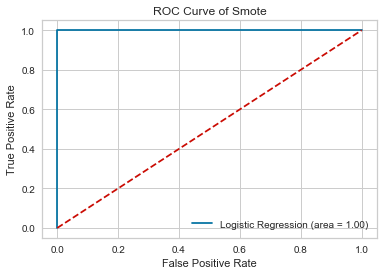

In [10]:
X_train, y_train, X_test, y_test, df_train = split_data(7)

smote = SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

parameters = {'C': np.linspace(1, 10, 10)}

mod_lr = LogisticRegression()
gs= GridSearchCV(mod_lr, parameters, cv=5)
gs.fit(X_train_smote, y_train_smote)


mod_lr_1 = LogisticRegression(C = gs.best_params_.get('C'))
mod_lr_1.fit(X_train_smote, y_train_smote)

y_train_pre = mod_lr_1.predict(X_train)

confusion_matrix_1 = confusion_matrix(y_train, y_train_pre)

print("+++++++++++++++++++++++++++")
print("Confusin Matrix with smote")
print(confusion_matrix_1)
print("+++++++++++++++++++++++++++")

rfe_score = roc_auc_score(y_train, y_train_pre)
fpr, tpr, thresholds= roc_curve(y_train, mod_lr_1.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Smote')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 2 A V) test set Confusion Matrix and ROC

Accuracy score: 1.0
test confusion matrix part 2av.
[[ 4  0]
 [ 0 15]]


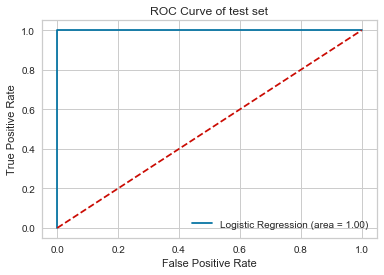

In [11]:
X_train, y_train, X_test, y_test, df_train = split_data(7)

model_test = LogisticRegression(solver='liblinear')
rfe = RFE(model_test, n_features_to_select = 21)
rfe.fit(X_test, y_test.values.ravel())
y_pred = rfe.predict(X_test)
print("Accuracy score:", rfe.score(X_test, y_test))

rfe_score = roc_auc_score(y_test, y_pred)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)

print("test confusion matrix part 2av.")
print(confusion_matrix_1)

fpr, tpr, thresholds= roc_curve(y_test, rfe.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()







# 2 A IV Confusion Matrix and ROC/AOC on training data

Conusion Matrix part IV
[[ 8  0]
 [ 0 61]]


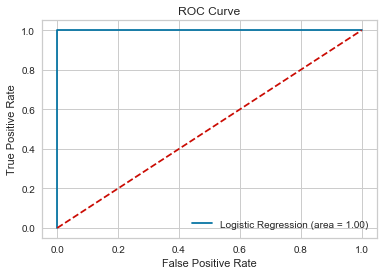

In [12]:
#y_train = y_train.replace(('bending', 'non-bending'), (0,1), inplace=True)
 
X_train, y_train, X_test, y_test, df_train = split_data(7)  
model = LogisticRegression(penalty = 'none')  
rfe = RFE(model, n_features_to_select = 21)

rfe.fit(X_train, y_train)  
y_pred_2 = rfe.predict(X_train) 

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
confusion_matrix = confusion_matrix(y_train, y_pred_2)
print('==========================')
print("Conusion Matrix part IV")
print(confusion_matrix)
print('==========================')

#will select significant columns 
cols = list(X_train.columns[rfe.support_])

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
rfe_score = roc_auc_score(y_train, y_pred_2)
fpr, tpr, thresholds= roc_curve(y_train, rfe.predict_proba(X_train)[:,1])  # calculates the false positive rate, true positive rate
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



#X_train, y_train, X_test, y_test, df_train = split_data(7)

#model_test = LogisticRegression(solver='liblinear')
#rfe = RFE(model_train, n_features_to_select = 21)
#rfe.fit(X_test, y_test.values.ravel())
#y_pred = rfe.predict(X_test)
#print("CV score:", rfe.score(X_test, y_test))
#confusion_matrix_1 = confusion_matrix(y_test, y_pred)

#print("test confusion matrix part 2av.")
#print(confusion_matrix_1)

#rfe_score = roc_auc_score(y_test, y_pred)
#fpr, tpr, thresholds= roc_curve(y_test, rfe.predict_proba(X_test)[:,1])  # calculates the false positive rate, true positive rate
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rfe_score)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve of test set')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

#print("++++++++++++++++++++++++++")






# test

# 2a i) Columns 1,2 and 6 scatter plot

In [13]:
#Lists needed for Datasets

X_train, y_train, X_test, y_test, df_train = split_data(1) 

mean1  = df_train["mean_1"]
std1   = df_train["std_1"]
median1 = df_train["median_1"]

mean2  = df_train["mean_2"]
std2   = df_train["std_2"]
median2 = df_train["median_2"]

mean6  = df_train["mean_6"]
std6   = df_train["std_6"]
median6 = df_train["median_6"]

CLASS = df_train["class"]

In [14]:
data = list(zip(mean1, std1, median1, mean2, std2, median2, mean6, std6, median6, CLASS))

In [15]:
to_pairplot = pd.DataFrame(data, columns = ['mean1', 'std1', 'median1', 'mean2', 'std2', 'median2', 'mean6', 'std6', 'median6', 'class'])
to_pairplot

,mean1,std1,median1,mean2,std2,median2,mean6,std6,median6,class
0,43.954500,1.558835,44.330,0.426250,0.338690,0.470,0.493292,0.513506,0.430,bending
1,42.179813,3.670666,43.500,0.696042,0.630860,0.500,0.613521,0.524317,0.500,bending
2,41.678063,2.243490,41.750,0.535979,0.405469,0.500,0.383292,0.389164,0.430,bending
3,43.454958,1.386098,43.250,0.378083,0.315566,0.470,0.679646,0.622534,0.500,bending
4,43.969125,1.618364,44.500,0.413125,0.263111,0.470,0.555313,0.487826,0.490,bending
...,...,...,...,...,...,...,...,...,...,...
64,34.763333,4.742208,35.290,4.223792,2.278004,3.900,3.288271,1.647528,3.270,non-bending
65,34.935813,4.645944,35.500,4.115750,2.335243,3.845,3.280021,1.700918,3.015,non-bending
66,34.333042,4.948770,34.750,4.396958,2.568680,3.900,3.261583,1.617290,2.980,non-bending
67,34.599875,4.731790,35.125,4.398833,2.538521,4.025,3.289542,1.680170,3.015,non-bending


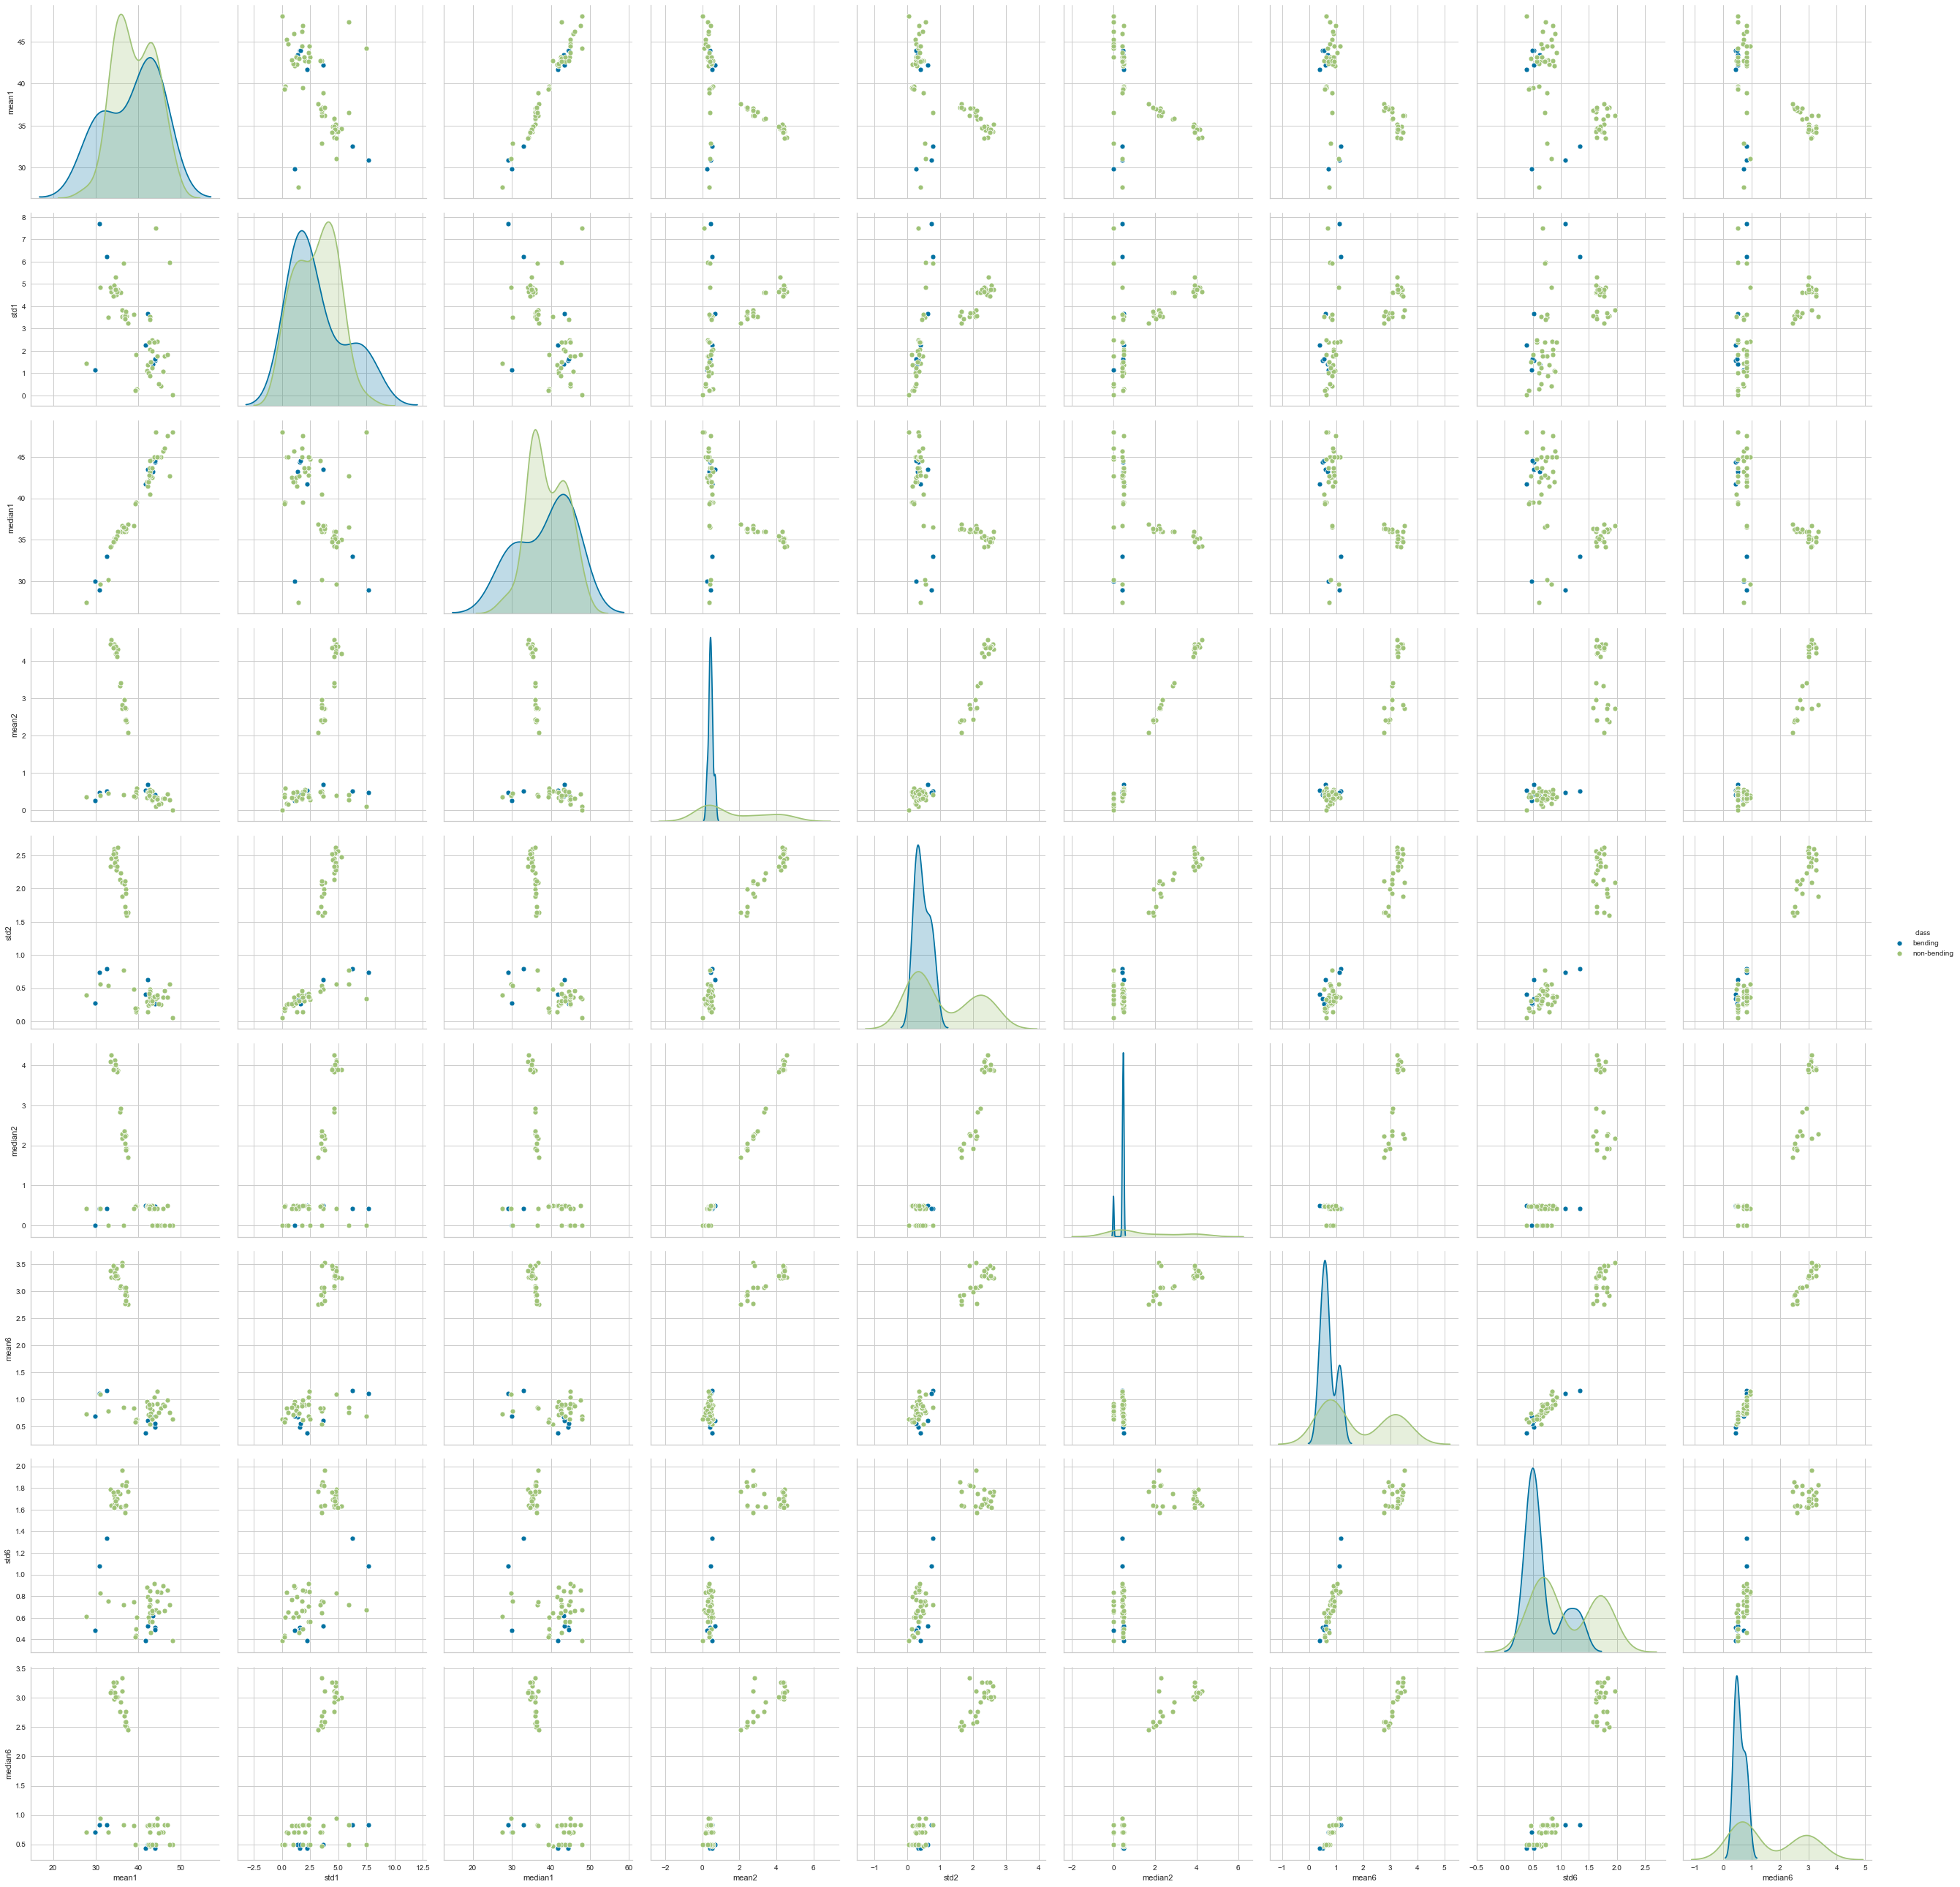

In [16]:
sns.pairplot(to_pairplot, hue = 'class', height = 4)
#plt.suptitle("Scatter Matrix", fontsize = 30)

# 2 a ii) 


In [17]:
X_train, y_train, X_test, y_test, df_train = split_data(2)

In [18]:
df_train

,mean_1,std_1,min_1,FirstQuartileRange_1,median_1,ThrirdQuartileRange_1,max_1,mean_2,std_2,min_2,...,ThrirdQuartileRange_11,max_11,mean_12,std_12,min_12,FirstQuartileRange_12,median_12,ThrirdQuartileRange_12,max_12,class
0,44.057167,1.556971,36.50,43.2500,44.500,45.0000,46.50,0.381042,0.329540,0.0,...,36.2500,38.25,0.388333,0.478528,0.00,0.0000,0.000,0.7100,1.50,bending
1,43.278875,3.473355,33.75,42.0000,45.000,45.2500,47.75,0.673292,0.634285,0.0,...,33.7500,38.50,0.586083,0.491873,0.00,0.0000,0.470,0.8700,2.18,bending
2,41.621208,3.118644,33.00,39.6525,42.330,44.2500,45.75,0.623083,0.489595,0.0,...,30.5625,36.00,0.347500,0.363144,0.00,0.0000,0.430,0.5000,1.50,bending
3,44.117042,1.359836,39.00,43.5000,45.000,45.0000,48.00,0.250042,0.314099,0.0,...,23.7500,26.00,0.543875,0.473445,0.00,0.4300,0.500,0.7100,4.06,bending
4,43.486208,1.281976,36.67,42.3300,43.710,44.5000,45.00,0.378667,0.284434,0.0,...,23.5000,26.00,0.585750,0.487918,0.00,0.4225,0.500,0.8300,2.96,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.966250,4.733014,22.33,32.0000,35.500,38.7500,46.00,4.207958,2.331940,0.0,...,18.5000,25.25,3.430208,1.647979,0.00,2.1700,3.350,4.4400,9.39,non-bending
65,34.737042,4.276717,21.50,32.0000,35.500,37.7500,45.67,4.217333,2.337759,0.0,...,18.2500,25.00,3.225917,1.665326,0.00,2.0500,3.085,4.3500,10.21,non-bending
66,33.886458,5.143776,18.33,30.4575,34.375,37.5000,45.00,4.332208,2.453111,0.0,...,18.2500,24.00,3.274750,1.670593,0.00,2.0500,2.955,4.4375,8.01,non-bending
67,34.836458,4.869092,18.33,32.0000,35.750,38.6900,44.00,4.257750,2.512633,0.0,...,18.2500,23.00,3.409458,1.707089,0.47,2.1700,3.110,4.3450,8.84,non-bending


In [19]:
#df_train.to_csv('2split.csv', index=False)

mean1  = df_train["mean_1"]
std1   = df_train["std_1"]
median1 = df_train["median_1"]

mean2  = df_train["mean_2"]
std2   = df_train["std_2"]
median2 = df_train["median_2"]

mean6  = df_train["mean_6"]
std6   = df_train["std_6"]
median6 = df_train["median_6"]

mean7  =    df_train["mean_7"]
std7   =     df_train["std_7"]
median7 = df_train["median_7"]

mean8  =    df_train["mean_8"]
std8 =     df_train["std_8"]
median8 = df_train["median_8"]

mean12  =    df_train["mean_12"]
std12   =     df_train["std_12"]
median12 = df_train["median_12"]


CLASS = df_train["class"]

In [20]:
data = list(zip(mean1, std1, median1, mean2, std2, median2, mean6, std6, median6, mean7, std7, median7, mean8, std8, median8, mean12, std12, median12, CLASS))

In [21]:
to_pairplot2 = pd.DataFrame(data, columns = ['mean1', 'std1', 'median1', 'mean2', 'std2', 'median2', 'mean6', 'std6', 'median6','mean7', 'std7', 'median7', 'mean8', 'std8', 'median8', 'mean12', 'std12', 'median12','class'])


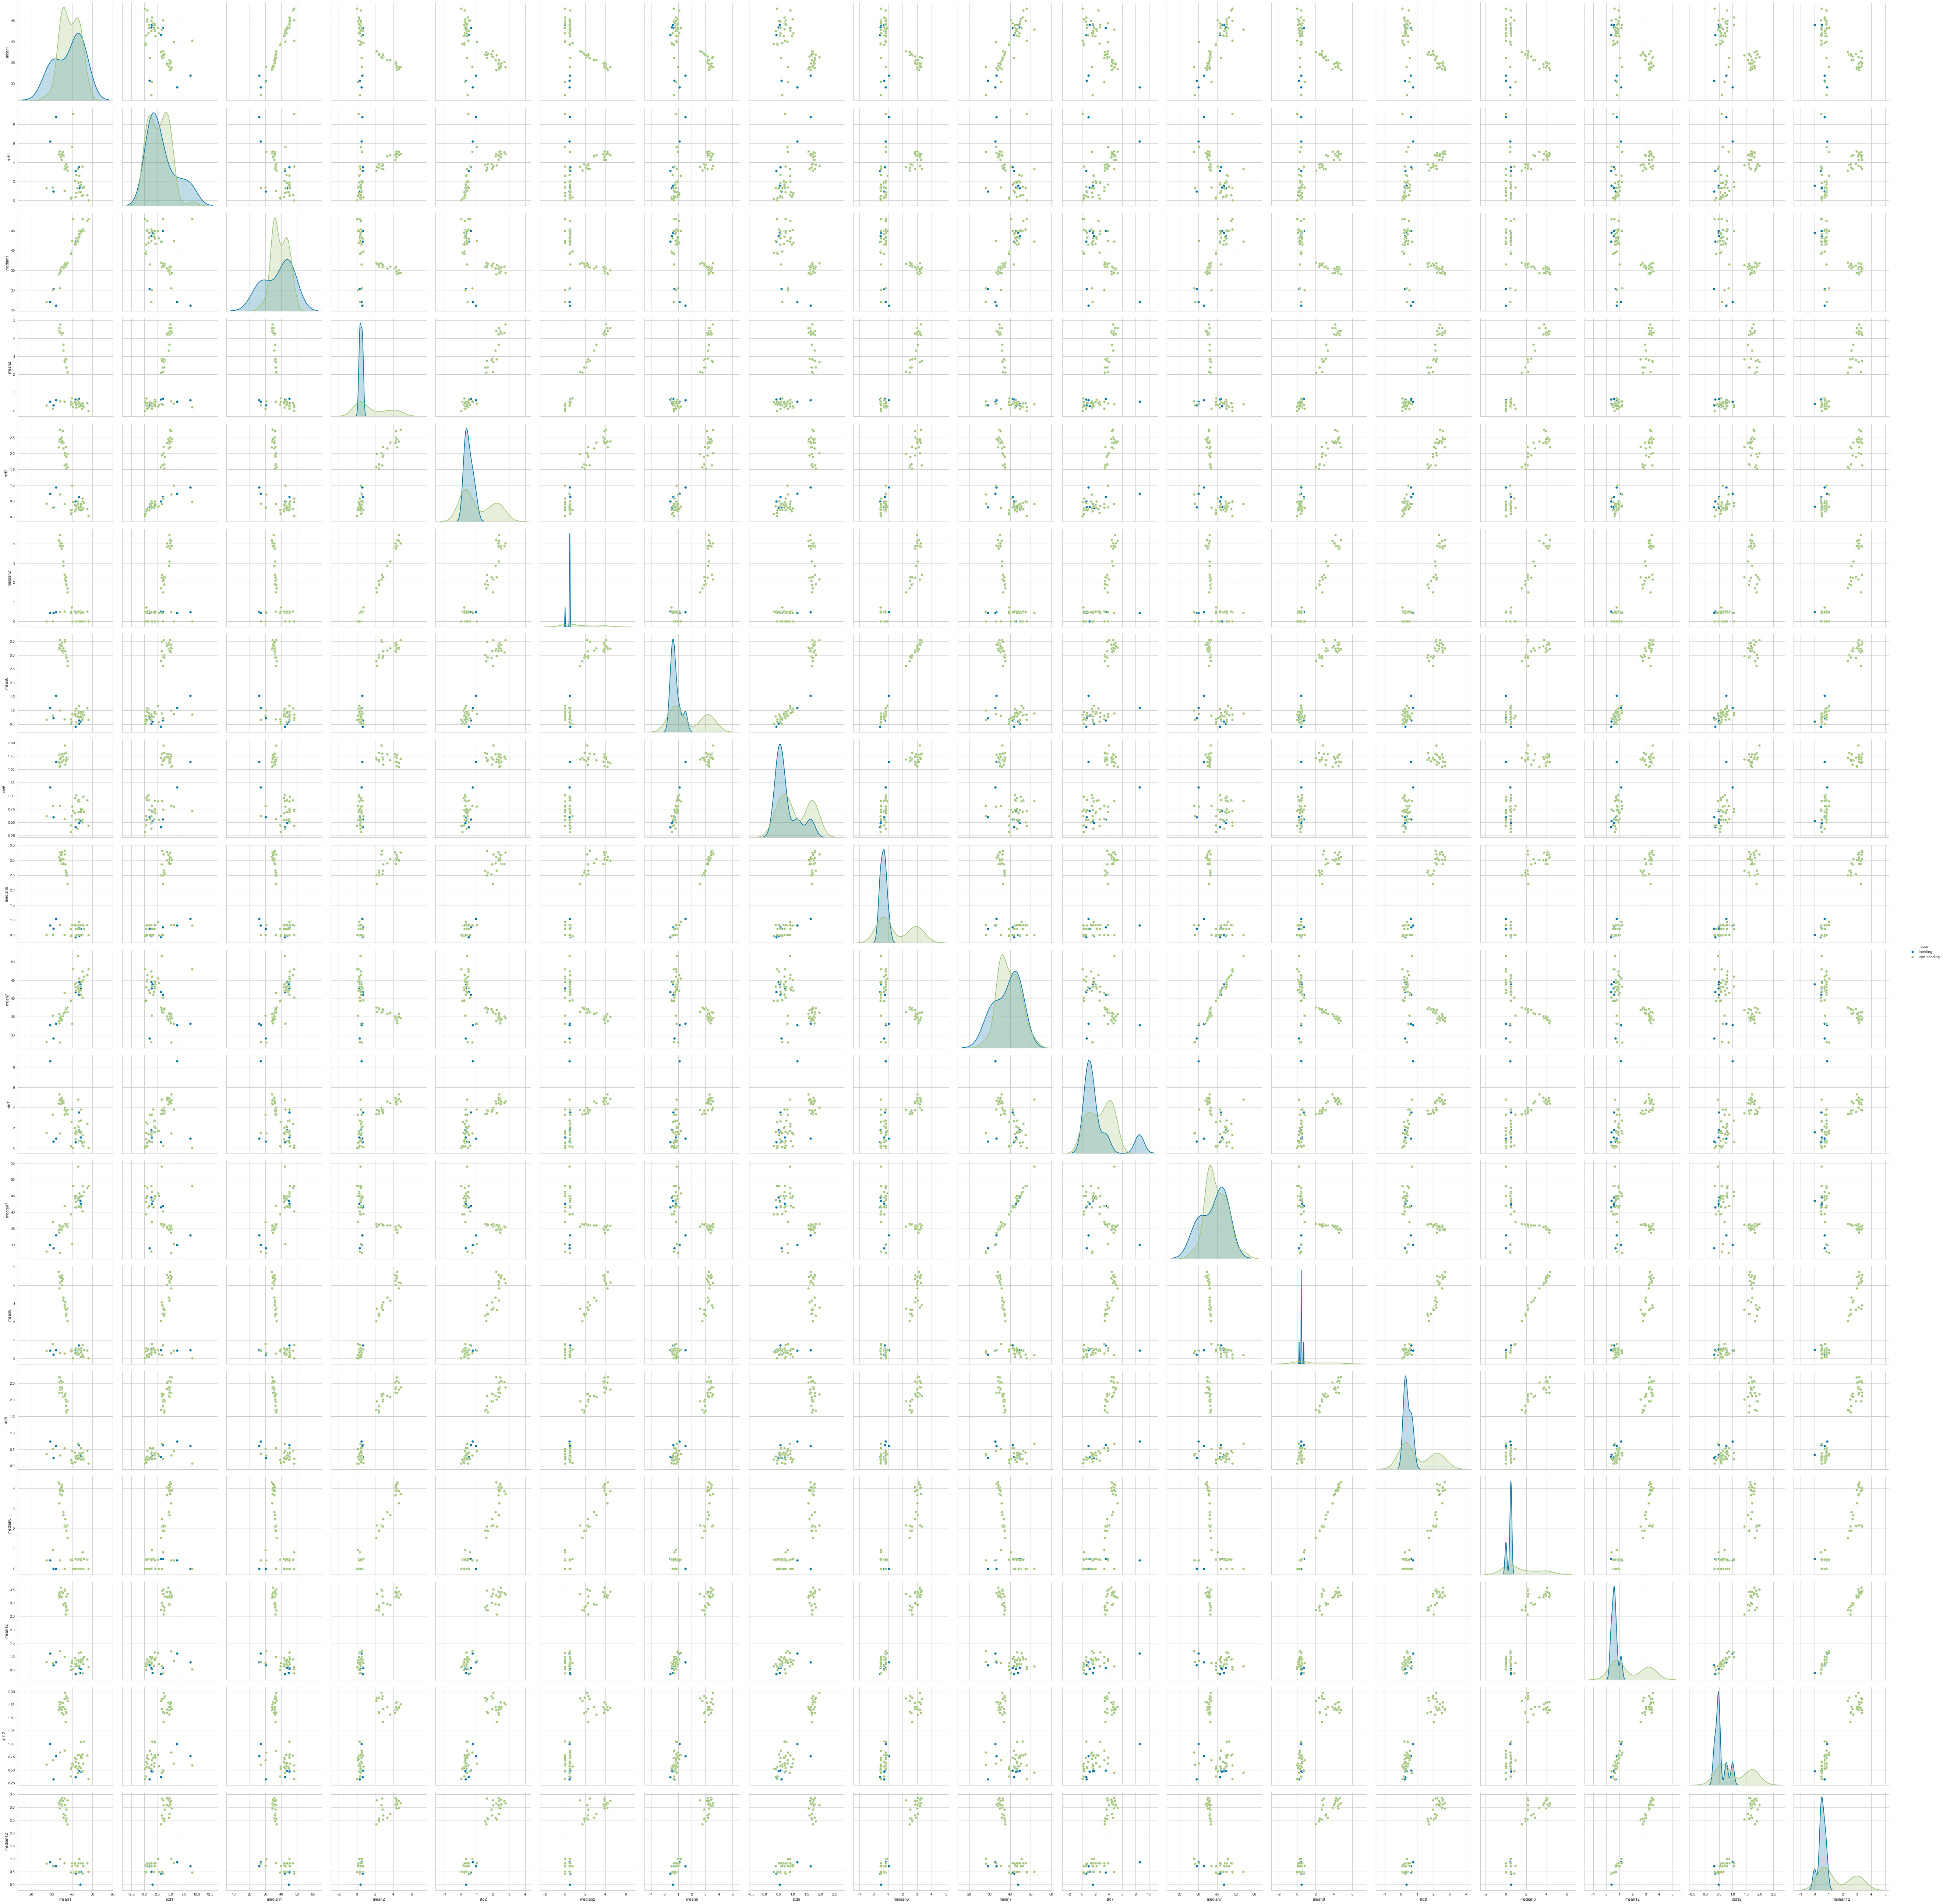

In [22]:
sns.pairplot(to_pairplot2, hue = 'class', height = 4)


# there does not seem to be much of a major differnce with the results in 2ai


# 2 a iii) Breaking dataset to 1-20 time series and use Logistic Regression

In [23]:

#https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example/notebook

for i in range(1, 21):  #Loop for calculating the best l & p for dataset by using reduced feature eliminition
    cols = []
    X_train, y_train, X_test, y_test, df_train = split_data(i)
    #adding none penalty will make the algorithm work faster
    model = LogisticRegression(penalty = 'none')  
    rfe = RFE(estimator= model, n_features_to_select = 3 * i )
    rfe.fit(X_train, y_train) 
    #using cv = stratified cross fold is needed 
    cv_score = cross_val_score(rfe, X_train, y_train, cv=StratifiedKFold(5), scoring='accuracy')  
    
    
    #simple algorithm to find best CV score and best # of fts 
    mean_of_cv_score  =  np.mean(cv_score)
    highest_cv_score = 0
    cols1 = list(X_train.columns)
    cols = np.asarray(cols1)
    #print(len(cols))
    if mean_of_cv_score > highest_cv_score:
        highest_cv_score = mean_of_cv_score
        
        
    print("Most Optimal CV score: " , highest_cv_score)
    print("Optimal number of features: " , rfe.n_features_)


Most Optimal CV score:  0.956043956043956
Optimal number of features:  3
Most Optimal CV score:  0.8846153846153847
Optimal number of features:  6
Most Optimal CV score:  0.9274725274725275
Optimal number of features:  9
Most Optimal CV score:  0.956043956043956
Optimal number of features:  12
Most Optimal CV score:  0.9274725274725275
Optimal number of features:  15
Most Optimal CV score:  0.9703296703296704
Optimal number of features:  18
Most Optimal CV score:  0.9846153846153847
Optimal number of features:  21
Most Optimal CV score:  0.9703296703296704
Optimal number of features:  24
Most Optimal CV score:  0.956043956043956
Optimal number of features:  27
Most Optimal CV score:  0.9703296703296704
Optimal number of features:  30
Most Optimal CV score:  0.9857142857142858
Optimal number of features:  33
Most Optimal CV score:  0.9703296703296704
Optimal number of features:  36
Most Optimal CV score:  0.956043956043956
Optimal number of features:  39
Most Optimal CV score:  0.970329

##### using l = 7 as most optimal because I have similar accuracy with far less features being used

# 2 A IV) PLEASE REFER TO APPENDIX FOR CONUSION MATRIX AND AOC

In [24]:
import statsmodels.api as sm

df_train_new_trial = df_train[cols]
logit_model1=sm.Logit(y_train, df_train_new_trial)
model1 = logit_model1.fit(method = 'lbfgs')
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                   69
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                           65
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        18:30:22   Log-Likelihood:            -0.00012264
converged:                       True   LL-Null:                       -24.755
Covariance Type:            nonrobust   LLR p-value:                    0.9229
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean_1                      0.0226        nan        nan        nan         nan         nan
std_1                       0.0005        nan        nan        nan         nan         nan


# 2 A V) Please refer to 2 A V) in the appendix for code and the result of Conusion matrix and ROC Curve

#### it can be seen that the 

# 2 a vi)

## ## yes they seem to be well seperated because all of the P values are not significant because the p values are all very high 

# 2 a v ii ) The confusion matrix, AOC and ROC are in APPENDIX

## yes the classes are imbalanced because they are fitting to the highest class

# 2 bi)

In [25]:
# https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6

for i in range(1, 21):
    X_train, y_train, X_test, y_test, df_train = split_data(i)

    #scalar = StandardScaler()
    #X_train_fit = scalar.fit_transform(X_train)

    parameters = {'C': np.linspace(1, 10, 10) }

    mod_lr = LogisticRegression(penalty='l1', C = parameters, solver = 'liblinear')
    clf = GridSearchCV(mod_lr, parameters, cv=5)
    clf.fit(X_train, y_train)

    #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
    #sel_ = SelectFromModel(LogisticRegression(C= (1/clf.best_params_.get('C')), penalty='l2'))
    sel_ = SelectFromModel(LogisticRegression(penalty='l1', C= (1/clf.best_params_.get('C')), solver = 'liblinear'))
    sel_.fit(X_train, y_train)
    print("l:", i)
    selected_feat = X_train.columns[(sel_.get_support())]
    print('optimal features: {}'.format(len(selected_feat)))
    print('Optimal C', clf.best_params_.get('C'))
    print('Optimal score:', clf.best_score_)
    
    

l: 1
optimal features: 7
Optimal C 8.0
Optimal score: 0.9142857142857143
l: 2
optimal features: 8
Optimal C 3.0
Optimal score: 0.9417582417582417
l: 3
optimal features: 11
Optimal C 1.0
Optimal score: 0.9131868131868132
l: 4
optimal features: 10
Optimal C 2.0
Optimal score: 0.956043956043956
l: 5
optimal features: 14
Optimal C 1.0
Optimal score: 0.9274725274725275
l: 6
optimal features: 14
Optimal C 1.0
Optimal score: 0.9417582417582417
l: 7
optimal features: 9
Optimal C 8.0
Optimal score: 0.956043956043956
l: 8
optimal features: 12
Optimal C 4.0
Optimal score: 0.9703296703296704
l: 9
optimal features: 8
Optimal C 6.0
Optimal score: 0.9703296703296704
l: 10
optimal features: 15
Optimal C 1.0
Optimal score: 0.9417582417582417
l: 11
optimal features: 11
Optimal C 3.0
Optimal score: 0.9703296703296704
l: 12
optimal features: 15
Optimal C 1.0
Optimal score: 0.9417582417582417
l: 13
optimal features: 12
Optimal C 4.0
Optimal score: 0.9417582417582417
l: 14
optimal features: 18
Optimal C 3.0

# Optimal value of l=  8
##### optimal features: 10
##### Optimal C 4.0
##### Optimal score: 0.9703296703296704

# 2 b ii)

# the L1 regularization works better than logistic regression with variable selection, for varible section, the classes were well seperated which gave us p values that are close to one, meaning the features were not statistically significant

# L1 penalized with varibable selections preformes better and is much easier to implement

# 2 C i )

In [26]:
# https://medium.com/@aditya97p/l1-and-l2-regularization-237438a9caa6

   
for i in range(1, 21):
    X_train, y_train, X_test, y_test, df_train = split_data_multiclass(i)

    #scalar = StandardScaler()
    #X_train_fit = scalar.fit_transform(X_train)

    parameters = {'C': np.linspace(1, 100, 20) }

    mod_lr = LogisticRegression(penalty='l1', C = parameters, solver = 'saga', multi_class='multinomial')
    clf = GridSearchCV(mod_lr, parameters, cv=5)
    clf.fit(X_train, y_train)

    #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
    #sel_ = SelectFromModel(LogisticRegression(C= (1/clf.best_params_.get('C')), penalty='l2'))
    sel_ = SelectFromModel(LogisticRegression(penalty='l1', C= (1/clf.best_params_.get('C')), solver = 'saga', multi_class='multinomial'))
    sel_.fit(X_train, y_train)
    print("---------------------")
    print("l value:", i)
    selected_feat = X_train.columns[(sel_.get_support())]
    print('selected features: {}'.format(len(selected_feat)))
    print('value of lambda: ', clf.best_params_.get('C'))
    print('Accuracy:', clf.best_score_)
    

---------------------
l value: 1
selected features: 16
value of lambda:  27.052631578947366
Accuracy: 0.8395604395604396
---------------------
l value: 2
selected features: 60
value of lambda:  6.2105263157894735
Accuracy: 0.7373626373626373
---------------------
l value: 3
selected features: 89
value of lambda:  6.2105263157894735
Accuracy: 0.7384615384615385
---------------------
l value: 4
selected features: 158
value of lambda:  1.0
Accuracy: 0.7527472527472527
---------------------
l value: 5
selected features: 198
value of lambda:  1.0
Accuracy: 0.7681318681318681
---------------------
l value: 6
selected features: 46
value of lambda:  47.89473684210526
Accuracy: 0.7384615384615385
---------------------
l value: 7
selected features: 114
value of lambda:  21.842105263157894
Accuracy: 0.7384615384615385
---------------------
l value: 8
selected features: 234
value of lambda:  6.2105263157894735
Accuracy: 0.7087912087912087
---------------------
l value: 9
selected features: 368
val

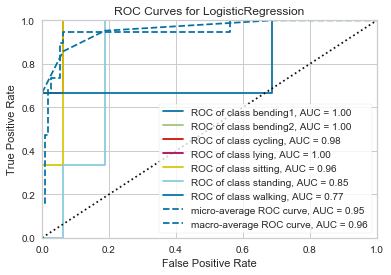

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b23e9e10>,
       encoder={0: 'bending1', 1: 'bending2', 2: 'cycling', 3: 'lying',
                4: 'sitting', 5: 'standing', 6: 'walking'},
       estimator=LogisticRegression(C=68.73684210526315,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga'))

In [27]:

X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)
model = LogisticRegression(penalty='l1', C = 68.73684210526315, solver = 'saga', multi_class='multinomial')
plot_ROC_curve(model, X_train, y_train, X_test, y_test)



# 2 c ii)

In [28]:

for i in range(1, 21):
    X_train, y_train, X_test, y_test, df_train = split_data_multiclass(i)
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred  =  classifier.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    
    print("---------------------")
    print("l = ", i)
    print("Accuracy: ", ac)

---------------------
l =  1
Accuracy:  0.7894736842105263
---------------------
l =  2
Accuracy:  0.5789473684210527
---------------------
l =  3
Accuracy:  0.6842105263157895
---------------------
l =  4
Accuracy:  0.7368421052631579
---------------------
l =  5
Accuracy:  0.6842105263157895
---------------------
l =  6
Accuracy:  0.5263157894736842
---------------------
l =  7
Accuracy:  0.631578947368421
---------------------
l =  8
Accuracy:  0.5789473684210527
---------------------
l =  9
Accuracy:  0.631578947368421
---------------------
l =  10
Accuracy:  0.631578947368421
---------------------
l =  11
Accuracy:  0.631578947368421
---------------------
l =  12
Accuracy:  0.5789473684210527
---------------------
l =  13
Accuracy:  0.631578947368421
---------------------
l =  14
Accuracy:  0.7368421052631579
---------------------
l =  15
Accuracy:  0.631578947368421
---------------------
l =  16
Accuracy:  0.631578947368421
---------------------
l =  17
Accuracy:  0.6315789473684

### best l = 1 and accuracy is 0.7894736842105263

# Confusion Matrix for Gaussian in Appendix

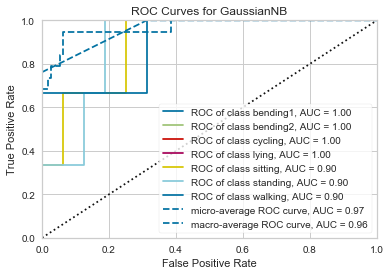

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9abc66150>,
       encoder={0: 'bending1', 1: 'bending2', 2: 'cycling', 3: 'lying',
                4: 'sitting', 5: 'standing', 6: 'walking'},
       estimator=GaussianNB())

In [29]:
X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)

model = GaussianNB()
plot_ROC_curve(model, X_train, y_train, X_test, y_test)

In [30]:
for i in range(1, 21):
    X_train, y_train, X_test, y_test, df_train = split_data_multiclass(i)
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    y_pred  =  classifier.predict(X_test)
    ac = accuracy_score(y_test,y_pred)
    
    print("---------------------")
    print("l = ", i)
    print("Accuracy: ", ac)

---------------------
l =  1
Accuracy:  0.7894736842105263
---------------------
l =  2
Accuracy:  0.6842105263157895
---------------------
l =  3
Accuracy:  0.7368421052631579
---------------------
l =  4
Accuracy:  0.7894736842105263
---------------------
l =  5
Accuracy:  0.6842105263157895
---------------------
l =  6
Accuracy:  0.6842105263157895
---------------------
l =  7
Accuracy:  0.7368421052631579
---------------------
l =  8
Accuracy:  0.6842105263157895
---------------------
l =  9
Accuracy:  0.7368421052631579
---------------------
l =  10
Accuracy:  0.7368421052631579
---------------------
l =  11
Accuracy:  0.6842105263157895
---------------------
l =  12
Accuracy:  0.7368421052631579
---------------------
l =  13
Accuracy:  0.6842105263157895
---------------------
l =  14
Accuracy:  0.6842105263157895
---------------------
l =  15
Accuracy:  0.631578947368421
---------------------
l =  16
Accuracy:  0.631578947368421
---------------------
l =  17
Accuracy:  0.68421052

### best l = 1 and accuracy is 0.7894736842105263

# Confusion Matrix for Gaussian in Appendix

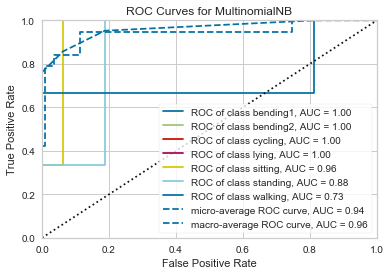

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9a8dd1950>,
       encoder={0: 'bending1', 1: 'bending2', 2: 'cycling', 3: 'lying',
                4: 'sitting', 5: 'standing', 6: 'walking'},
       estimator=MultinomialNB())

In [31]:
X_train, y_train, X_test, y_test, df_train = split_data_multiclass(1)

model = MultinomialNB()
plot_ROC_curve(model, X_train, y_train, X_test, y_test)

# 4.8.3

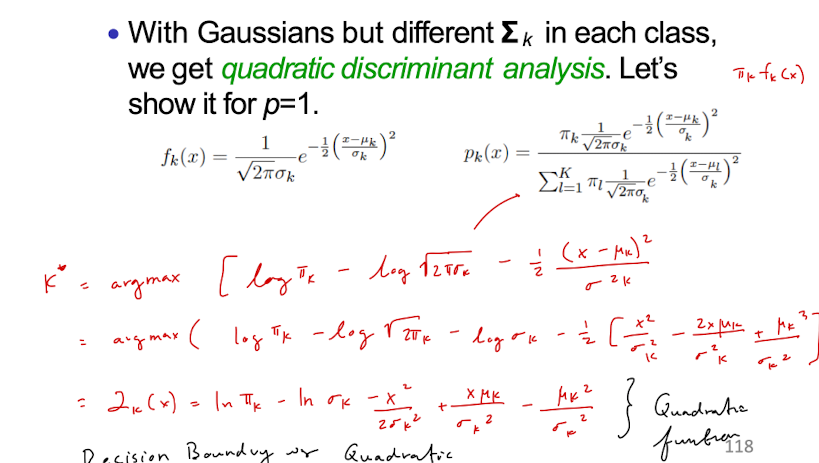

##### the final equation is a quadratic function, therfore, the bayes classifier is not linear, it is quadratic 

# 4.8.7

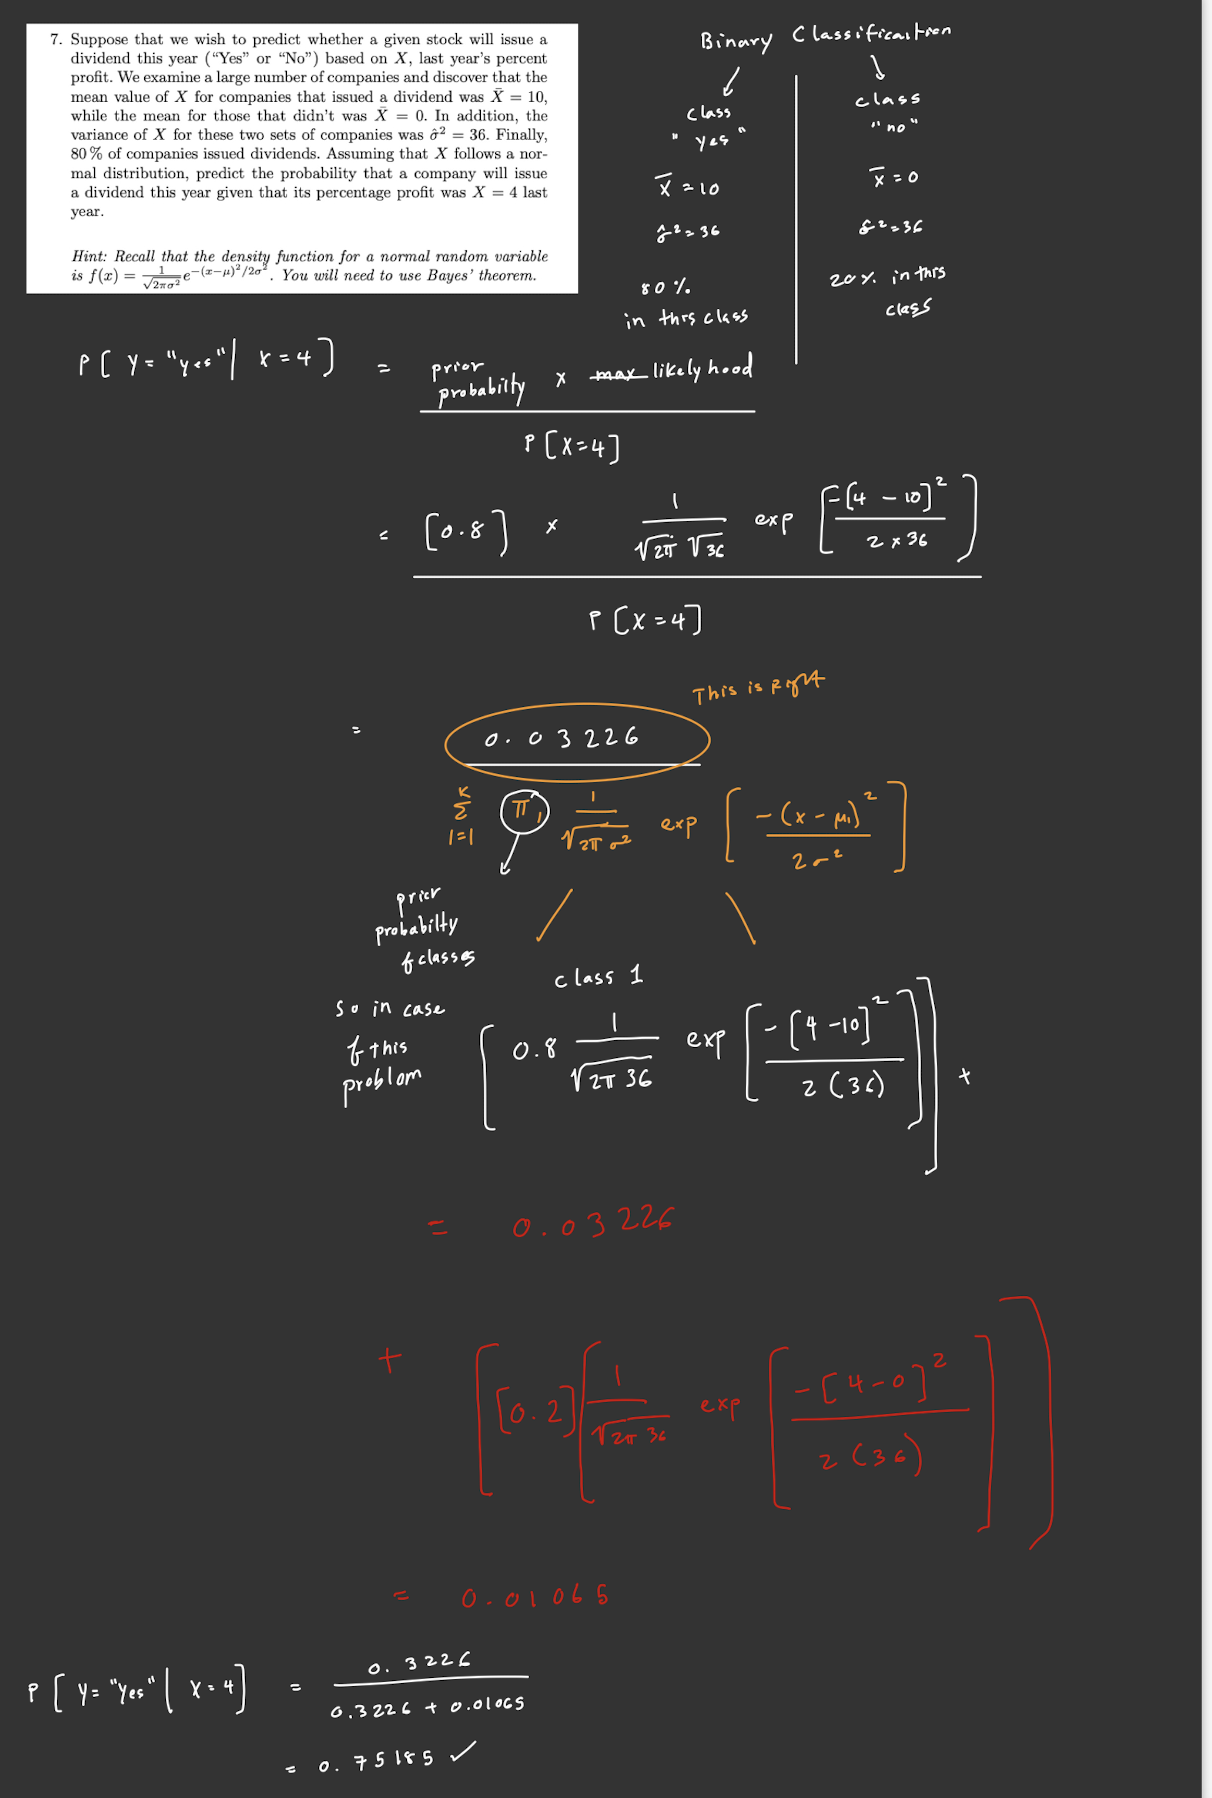